# Creación manual de PCA

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [ ]:
df = datasets.load_digits()
df = pd.DataFrame(df["data"])

In [ ]:
def show_heatmap(dataframe):
    ax = sns.heatmap(
        data = dataframe,
        cmap = "RdBu_r",
        center = 0
    )

    ax.set_title("Covariance matrix")

    plt.show()


In [ ]:
scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(df))

## Matriz de Covarianza

In [ ]:
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008


## HeatMap de covarianza

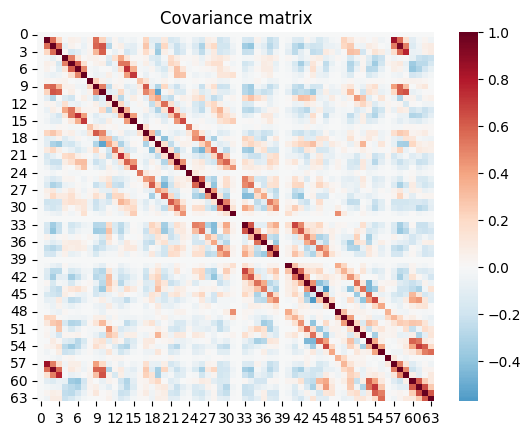

(array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
        2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
        1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
        1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
        0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
        0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
        0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
        0.34860306, 0.3195963 , 0.05037444, 0.29406627, 0.27692285,
        0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
        0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
        0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
        0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
        0.18983516, 0.        , 0.        , 0.        ]),
 array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
          0.        ,  0.        ],
        [ 0.18223392, -0

In [ ]:
cvdf = scaled_df.cov()
show_heatmap(cvdf)

## Eigenvalores y Eigenvectores

In [ ]:
eigval, eigvec = np.linalg.eig(cvdf)

eigval, eigvec

(array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
        2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
        1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
        1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
        0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
        0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
        0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
        0.34860306, 0.3195963 , 0.05037444, 0.29406627, 0.27692285,
        0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
        0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
        0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
        0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
        0.18983516, 0.        , 0.        , 0.        ]),
 array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
          0.        ,  0.        ],
        [ 0.18223392, -0

## Varianza explicada

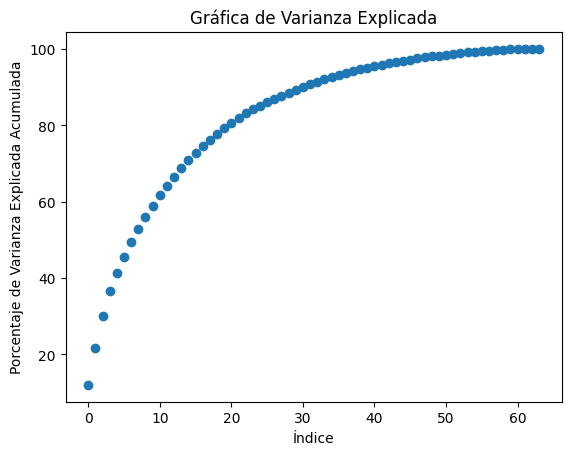

In [ ]:
idx = eigval.argsort()[::-1]
eigval = eigval[idx]
eigvec = eigvec[:, idx]
varianza_explicada = eigval / np.sum(eigval)
varianza_explicada_acumulada_porcentaje = np.cumsum(varianza_explicada)*100
varianza_explicada_acumulada_porcentaje
indices = np.arange(len(varianza_explicada_acumulada_porcentaje))

plt.scatter(indices, varianza_explicada_acumulada_porcentaje)
plt.xlabel("Índice")
plt.ylabel("Porcentaje de Varianza Explicada Acumulada")
plt.title("Gráfica de Varianza Explicada")

plt.show()

In [ ]:
eigvec_list = eigvec.tolist()
eigval_list = eigval.tolist()
valores_vectores = list(zip(eigval_list, eigvec_list))
valores_vectores.sort(reverse=True, key=lambda x: x[0])
valores_propios, vectores_propios = zip(*valores_vectores)

valores_propios = np.array(valores_propios)
vectores_propios = np.array(vectores_propios)

In [ ]:
valores_propios

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.29406627, 0.27692285, 0.258273  ,
       0.24783029, 0.2423566 , 0.217582  , 0.20799593, 0.2000909 ,
       0.18983516, 0.17612894, 0.16875236, 0.15818474, 0.14311427,
       0.13321081, 0.12426371, 0.11932898, 0.11188655, 0.10250434,
       0.09840876, 0.09018543, 0.08246812, 0.07635394, 0.06328961,
       0.05037444, 0.        , 0.        , 0.        ])

## Graficacion de componente principal

In [ ]:
def graficar_comp_principal(num_componente): # Función que grafica la componente
  plt.figure(figsize=(15,5)) # Cambiar largo de la imagen la imagen

  all_componentes_vector_prop = vectores_propios[:,num_componente]
  componentes_vector_prop = vectores_propios[:,num_componente]
  componentes_vector_prop = len(componentes_vector_prop)

  sns.barplot(x=np.arange(componentes_vector_prop), y=all_componentes_vector_prop, color="darkorange") # Hace la gráfica, el np.arange se usa
  # para crear los índices del arreglo de 0 a 63

  # Etiquetas
  plt.title(f"Componente principal número {num_componente}")
  plt.ylabel("Peso del componente")
  plt.grid()
  plt.tight_layout()
  plt.show()

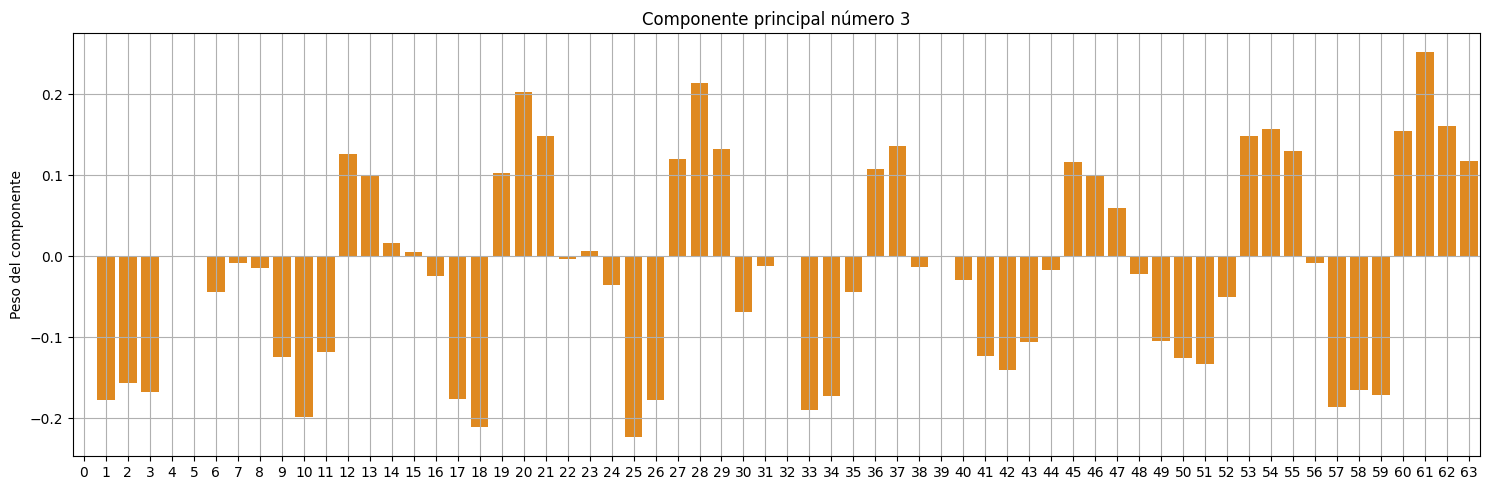

In [ ]:
graficar_comp_principal(3)

In [ ]:
def heatmap_pixel(num_componente):
    heatmap = plt.imshow(vectores_propios[:,num_componente].reshape(8,8), cmap='RdBu_r')

    # Etiquetas
    plt.title(f"Componente principal número {num_componente}")
    plt.tight_layout()
    plt.colorbar()
    plt.show()

## HeatMap de pesos

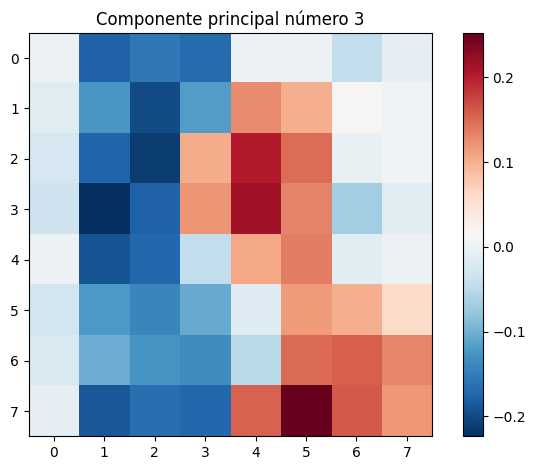

In [ ]:
heatmap_pixel(3)

## Cluster final

In [ ]:
def projection(data, eigenvectors, selected_digits):
    # Selecting the components

    components = eigenvectors[:, :2]

    # Projecting the data

    data = np.dot(data, components)
    y = datasets.load_digits().target
    mask = np.isin(y, selected_digits)
    x = data[mask]
    y = y[mask]

    # Plotting the projection

    fig, ax = plt.subplots(figsize = (8, 8))

    for digit, color in zip(selected_digits, ["blue", "green", "orange"]):
        sns.scatterplot(
            x = x[y == digit, 0],
            y = x[y == digit, 1],
            label = f"Digit {digit}",
            ax = ax,
            alpha = 0.5
        )

    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_title(f"PCA Projection of Selected Digits: {selected_digits}")
    plt.legend(title = "Digits")
    plt.show()

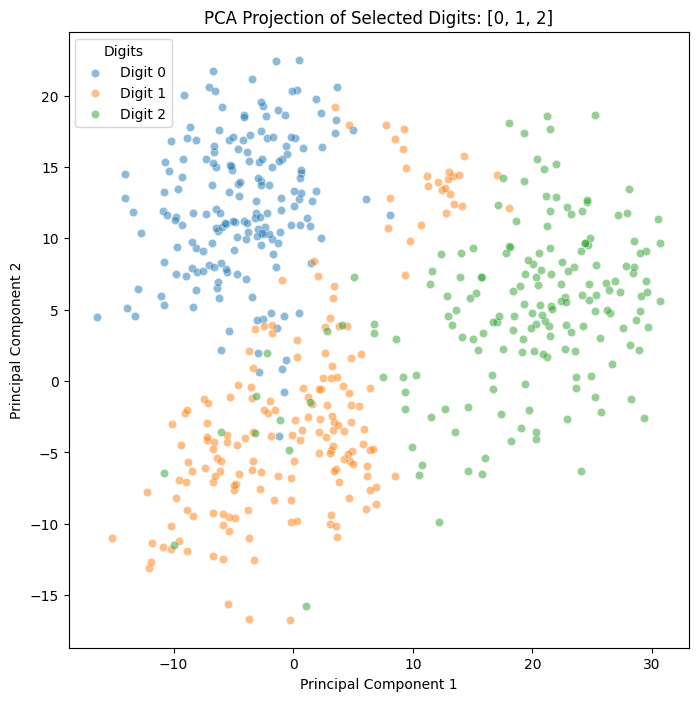

In [ ]:
projection(df, vectores_propios, [0, 1, 2])